<h1>Лабораторная работа №1.<span class="tocSkip"></span></h1>
<h2>Часть 1</h2>
<div class="toc"><ul class="toc-item"></ul></div>

In [309]:
import pandas as pd
from tabulate import tabulate
data = {
    "Вариант": [24],
    "Параметры (a; σ²)": ["(0;16)"],
    "n": [120],
    "q": [2.3],
    "k": [5],
    "Правило для расчета числа интервалов группировки": ["Фридмана Диакониса"],
    "Закон распределения случайной величины Y": ["F-распределение с числом степеней свободы k1=6 и k2=5"]
}

df = pd.DataFrame(data)
print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

+-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------+
|   Вариант | Параметры (a; σ²)   |   n |   q |   k | Правило для расчета числа интервалов группировки   | Закон распределения случайной величины Y              |
|-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------|
|        24 | (0;16)              | 120 | 2.3 |   5 | Фридмана Диакониса                                 | F-распределение с числом степеней свободы k1=6 и k2=5 |
+-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------+


In [310]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

## 1. Смоделировать выборку из n независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a; σ²)

In [311]:
#исходные данные задачи 
n=120
mu, sigma = 0, 16 

In [312]:
# Генерация выборки
s = np.random.normal(mu, sigma, n)
print(s)

# Оценка среднего и стандартного отклонения
a_estimate = np.mean(s)  # Среднее
sigma_estimate = np.std(s, ddof=1)  # Стандартное отклонение с поправкой на степень свободы

# Печать оценок
print(f"Оценка среднего (a): {a_estimate}")
print(f"Оценка стандартного отклонения (σ): {sigma_estimate}")

# Дополнительный расчет среднего и стандартного отклонения вручную
# Ручной расчет среднего
manual_mean = sum(s) / n

# Ручной расчет стандартного отклонения
sum_squared_diff = sum((x - manual_mean) ** 2 for x in s)
manual_std_dev = math.sqrt(sum_squared_diff / (n - 1))

print(f"Оценка среднего вручную: {manual_mean}")
print(f"Оценка стандартного отклонения вручную: {manual_std_dev}")

[-16.65179586 -25.102104    -9.90662402   2.42867504  -8.18102809
 -25.01165728  -3.53436373  -6.84013865  -9.14621793  -4.1004162
   8.49366506   3.69189133   9.30490215  15.19638299   6.89176573
  11.96066363 -15.27112453   4.40217821   1.99780421  -5.54062358
 -20.74080939 -16.07799028 -10.56102643   7.57097633 -15.05677801
  18.35326689   5.71175976   2.38392675 -22.50674163  14.01881791
  22.0245819   11.59031265  -3.41394712   9.32003826  -8.24421505
  21.40200968  -8.92494007   8.49010907  26.78184141 -15.45880379
   9.88560877  -8.54155872  -9.59067124 -20.5916915  -20.17554117
  -9.84190817   1.93543326  -2.78049947   6.96424926  -0.55865436
 -23.51501708  13.8782202   25.24567505  18.33364711  -2.79738162
  15.09006911   1.13308501   5.89085045 -12.54114628  -4.96465581
  11.17334424  -7.99017993  -3.40687911   3.10317627  -0.0856421
  16.27127241 -18.98828241   9.53193119  17.45159279  23.80554187
  18.01044362   4.47208782 -11.39659393 -20.54984623   2.81144601
   2.0420001

## 1.1. Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом, Фридмана Диакониса. Вычислить средствами Python сумму абсолютных частот. Построить гистограмму абсолютных частот.

In [313]:
# Используем правило Фридмана-Диакониса для определения количества интервалов
k_bins = np.histogram_bin_edges(s, bins="fd")
print(f"Количество интервалов: {len(k_bins) - 1}")

# Находим абсолютные частоты для каждого интервала
count, bin_edges = np.histogram(s, bins=k_bins)
print("Абсолютные частоты по интервалам:", count)
print("Границы интервалов:", bin_edges)

# Сумма абсолютных частот
total_count = np.sum(count)
print(f"Сумма абсолютных частот: {total_count}")

# Рассчитываем межквартильный размах (IQR) вручную
q1_manual = np.percentile(s, 25)
q3_manual = np.percentile(s, 75)
iqr_manual = q3_manual - q1_manual

# Ручной расчет ширины интервала и количества интервалов
bin_width_manual = 2 * iqr_manual / np.cbrt(n)
data_range = s.max() - s.min()
num_bins_manual = int(np.ceil(data_range / bin_width_manual))

print(f"Ширина интервала вручную: {bin_width_manual}")
print(f"Количество интервалов вручную: {num_bins_manual}")

# Генерация границ интервалов вручную
bin_edges_manual = np.linspace(s.min(), s.max(), num_bins_manual + 1)

# Расчет абсолютных частот вручную
count_manual = [0] * num_bins_manual
for x in s:
    for i in range(num_bins_manual):
        if bin_edges_manual[i] <= x < bin_edges_manual[i + 1]:
            count_manual[i] += 1
            break
print("Абсолютные частоты вручную:", count_manual)
print("Сумма абсолютных частот вручную:", sum(count_manual))

Количество интервалов: 10
Абсолютные частоты по интервалам: [ 2 12 17 20 27 22 14  3  1  2]
Границы интервалов: [-34.1463443  -25.83388138 -17.52141846  -9.20895554  -0.89649261
   7.41597031  15.72843323  24.04089616  32.35335908  40.665822
  48.97828492]
Сумма абсолютных частот: 120
Ширина интервала вручную: 8.651478553836773
Количество интервалов вручную: 10
Абсолютные частоты вручную: [2, 12, 17, 20, 27, 22, 14, 3, 1, 1]
Сумма абсолютных частот вручную: 119


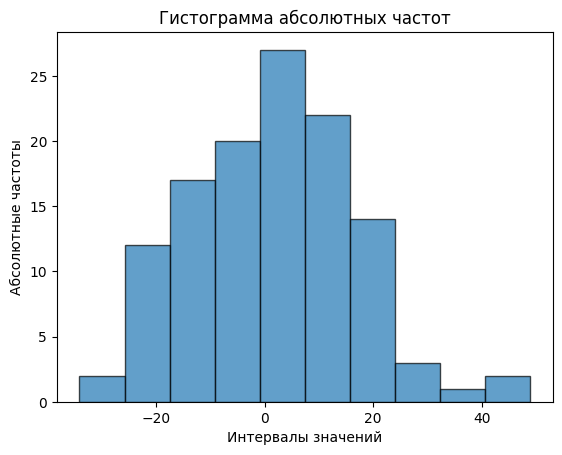

In [314]:
#Построить гистограмму абсолютных частот.
from scipy.stats import norm
# Построение гистограммы
count, bins, ignored = plt.hist(s, bins=k_bins, edgecolor='black', alpha=0.7)

# Добавление заголовков и подписей осей
plt.title("Гистограмма абсолютных частот")
plt.xlabel("Интервалы значений")
plt.ylabel("Абсолютные частоты")

# Отображение гистограммы
plt.show()

## 1.2. Сгруппировать данные в интервалы и найти интервальный ряд относительных частот. Вычислить средствами Python сумму относительных частот. Построить гистограмму относительных частот.


In [315]:
# Вычисление относительных частот
relative_frequencies = count / len(s)
print("Относительные частоты по интервалам:", relative_frequencies)

# Сумма относительных частот (должна быть равна 1)
total_relative_frequency = np.sum(relative_frequencies)
print(f"Сумма относительных частот: {total_relative_frequency}")

# Ручной расчет относительных частот
relative_frequencies_manual = [count / n for count in count_manual]
print("Относительные частоты вручную:", relative_frequencies_manual)
print("Сумма относительных частот вручную:", sum(relative_frequencies_manual))


Относительные частоты по интервалам: [0.01666667 0.1        0.14166667 0.16666667 0.225      0.18333333
 0.11666667 0.025      0.00833333 0.01666667]
Сумма относительных частот: 1.0
Относительные частоты вручную: [0.016666666666666666, 0.1, 0.14166666666666666, 0.16666666666666666, 0.225, 0.18333333333333332, 0.11666666666666667, 0.025, 0.008333333333333333, 0.008333333333333333]
Сумма относительных частот вручную: 0.9916666666666666


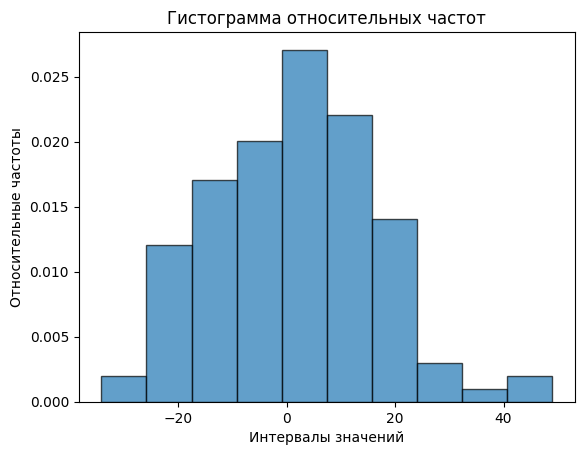

In [316]:
# Построение гистограммы относительных частот
plt.hist(s, bins=k_bins, density=True, edgecolor='black', alpha=0.7)

# Добавление заголовков и подписей осей
plt.title("Гистограмма относительных частот")
plt.xlabel("Интервалы значений")
plt.ylabel("Относительные частоты")

# Отображение гистограммы
plt.show()

## 2.1. Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины X (причем гистограмму и кривую распределения разместить на одном рисунке).

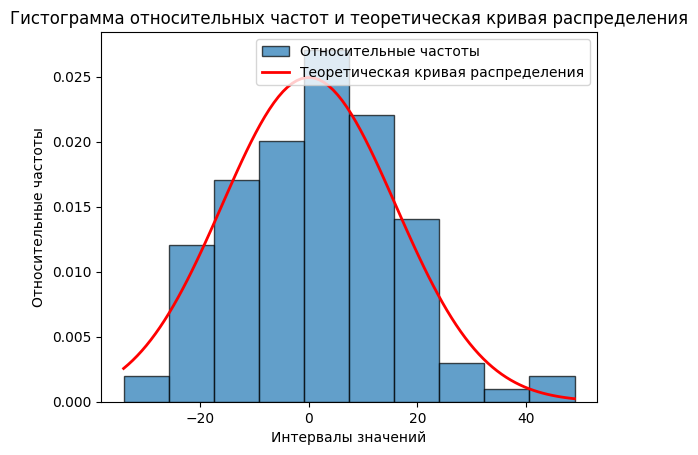

In [317]:
# Построение гистограммы относительных частот
count, bins, ignored = plt.hist(s, bins=k_bins, density=True, edgecolor='black', alpha=0.7, label="Относительные частоты")

# Теоретическая кривая нормального распределения
x = np.linspace(bins[0], bins[-1], 100)
pdf = norm.pdf(x, mu, sigma)  # Функция плотности вероятности

# Наложение кривой нормального распределения
plt.plot(x, pdf, color='red', linewidth=2, label="Теоретическая кривая распределения")

# Добавление заголовков, подписей осей и легенды
plt.title("Гистограмма относительных частот и теоретическая кривая распределения")
plt.xlabel("Интервалы значений")
plt.ylabel("Относительные частоты")
plt.legend()

# Отображение графика
plt.show()

## 2.2. Построить гистограмму абсолютных частот и график теоретической частоты распределения случайной величины X (причем и гистограмму, и график теоретической частоты разместить на одном рисунке).

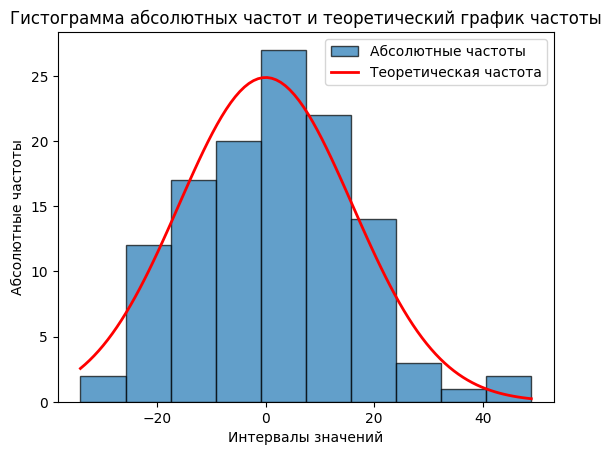

In [318]:
# Построение гистограммы абсолютных частот
count, bins, ignored = plt.hist(s, bins=k_bins, edgecolor='black', alpha=0.7, label="Абсолютные частоты")

# Вычисление значений для оси x и масштабированной теоретической частоты
x = np.linspace(bins[0], bins[-1], 100)
pdf_scaled = norm.pdf(x, mu, sigma) * n * (bins[1] - bins[0])

# Наложение теоретического графика частот
plt.plot(x, pdf_scaled, color='red', linewidth=2, label="Теоретическая частота")

# Добавление заголовков, подписей осей и легенды
plt.title("Гистограмма абсолютных частот и теоретический график частоты")
plt.xlabel("Интервалы значений")
plt.ylabel("Абсолютные частоты")
plt.legend()

# Отображение графика
plt.show()

## 2.3. Построить по выборке график эмпирической функции распределения случайной величины X (кумуляту относительных частот) и график теоретической функции распределения случайной величины X, разместив их на одном рисунке.

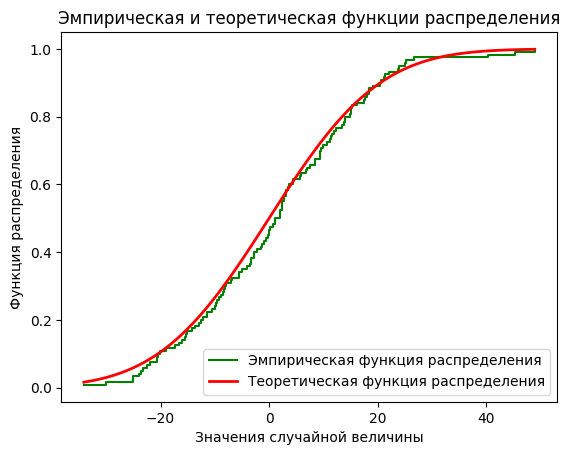

In [319]:
# Сортируем выборку для построения эмпирической функции распределения
s_sorted = np.sort(s)
# Вычисляем кумуляту относительных частот (ECDF)
empirical_cdf = np.arange(1, n + 1) / n

# Создаем значения для теоретической функции распределения (CDF)
x = np.linspace(min(s_sorted), max(s_sorted), 100)
theoretical_cdf = norm.cdf(x, mu, sigma)

# Построение графика эмпирической и теоретической функции распределения
plt.step(s_sorted, empirical_cdf, where='post', label="Эмпирическая функция распределения", color="green")
plt.plot(x, theoretical_cdf, label="Теоретическая функция распределения", color="red", linewidth=2)

# Добавление заголовков, подписей осей и легенды
plt.title("Эмпирическая и теоретическая функции распределения")
plt.xlabel("Значения случайной величины")
plt.ylabel("Функция распределения")
plt.legend()

# Отображение графика
plt.show()

## 2.4. Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему статистическую интерпретацию. В частности, ответить на вопрос: Каково теоретически ожидаемое число выбросов для выборки данного объема?

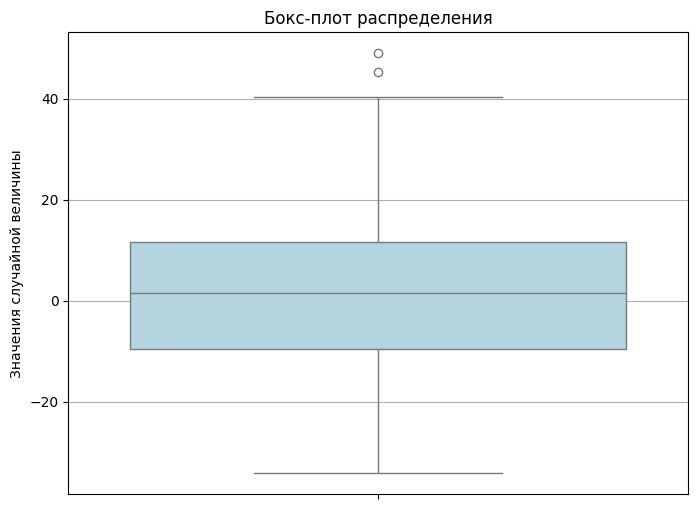

Axes(0.125,0.11;0.775x0.77)


In [320]:
import seaborn as sb
import matplotlib.pyplot as plt

# Преобразуем массив данных в формат DataFrame для удобства
df_box = pd.DataFrame(s, columns=["Значения случайной величины"])

# Построение бокс-плота с использованием Seaborn
plt.figure(figsize=(8, 6))
W = sb.boxplot(data=df_box, y="Значения случайной величины", color="lightblue")
plt.title("Бокс-плот распределения")
plt.ylabel("Значения случайной величины")
plt.grid(axis='y')

# Отображение графика
plt.show()

# Печать объекта графика
print(W)

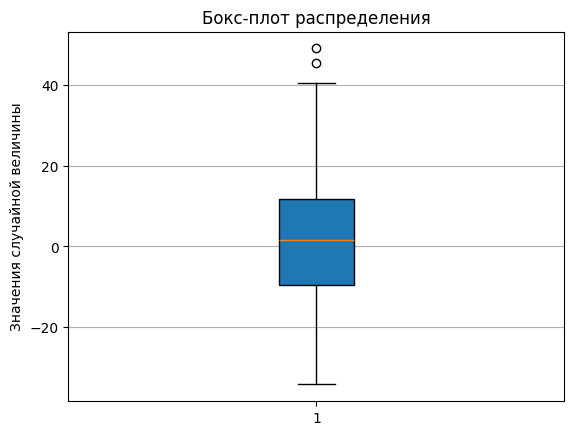

In [321]:
# Построение бокс-плота
plt.boxplot(s, vert=True, patch_artist=True)
plt.title("Бокс-плот распределения")
plt.ylabel("Значения случайной величины")
plt.grid(axis='y')

# Отображение графика
plt.show()

Q1 (25-й перцентиль): -9.65348047515414
Медиана (Q2, 50-й перцентиль): 1.53425913396453
Q3 (75-й перцентиль): 11.682900395129222
IQR (межквартильный размах): 21.336380870283364
Нижняя граница уса: -41.658051780579186
Верхняя граница уса: 43.68747170055427
Выбросы: [np.float64(45.32257356731995), np.float64(48.978284923650556)]
Теоретически ожидаемое число выбросов для выборки объема 120: 0.84


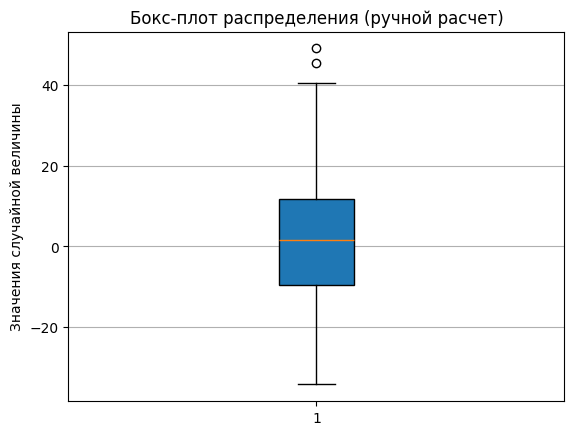

In [322]:
# Сортируем выборку
sorted_sample = np.sort(s)

# Определение квартилей и медианы вручную
q1 = np.percentile(sorted_sample, 25)
q2 = np.median(sorted_sample)
q3 = np.percentile(sorted_sample, 75)
iqr = q3 - q1

print(f"Q1 (25-й перцентиль): {q1}")
print(f"Медиана (Q2, 50-й перцентиль): {q2}")
print(f"Q3 (75-й перцентиль): {q3}")
print(f"IQR (межквартильный размах): {iqr}")

# Рассчитаем границы усов
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

# Определим выбросы как значения за пределами усов
outliers = [x for x in sorted_sample if x < lower_whisker or x > upper_whisker]

print(f"Нижняя граница уса: {lower_whisker}")
print(f"Верхняя граница уса: {upper_whisker}")
print(f"Выбросы: {outliers}")

expected_outliers = n * 0.007
print(f"Теоретически ожидаемое число выбросов для выборки объема {n}: {expected_outliers}")

# Построение бокс-плота с использованием рассчитанных вручную значений
plt.boxplot(sorted_sample, vert=True, patch_artist=True)
plt.title("Бокс-плот распределения (ручной расчет)")
plt.ylabel("Значения случайной величины")
plt.grid(axis='y')

plt.show()

Оценка вероятности попадания в 5-ый интервал: 0.225


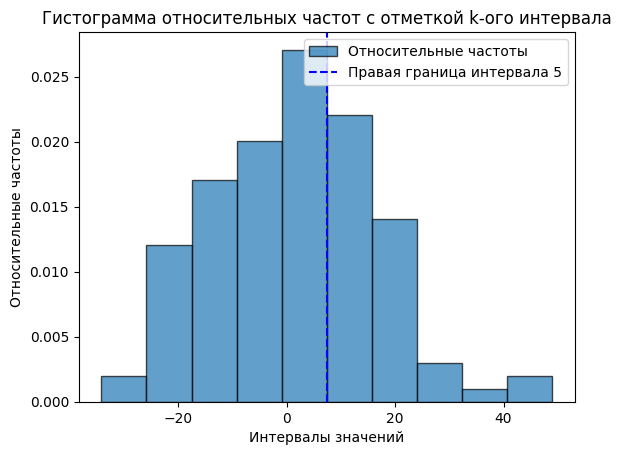

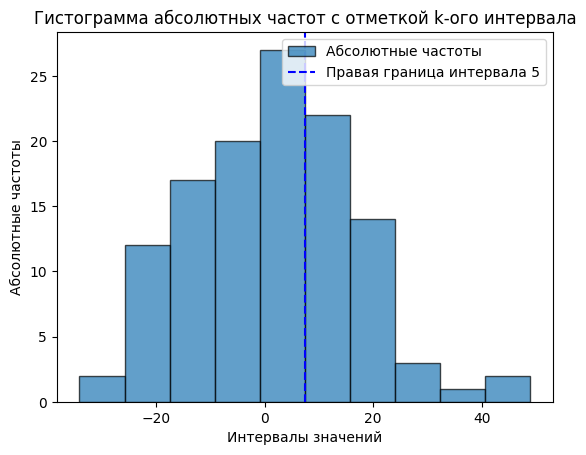

Оценка значения интегральной функции распределения в правой границе 5-ого интервала: 0.65
Точное значение интегральной функции распределения в правой границе 5-ого интервала: 0.6784963276749375


In [323]:
# A) Оценка вероятности попадания значений случайной величины X в k-ый интервал
k = 5
probability_k_interval = relative_frequencies[k - 1]  # k-ый интервал соответствует индексу k-1
print(f"Оценка вероятности попадания в {k}-ый интервал: {probability_k_interval}")

# B) График с геометрической интерпретацией этой оценки
plt.hist(s, bins=k_bins, density=True, edgecolor='black', alpha=0.7, label="Относительные частоты")
plt.axvline(x=bin_edges[k], color='blue', linestyle='--', label=f'Правая граница интервала {k}')
plt.title("Гистограмма относительных частот с отметкой k-ого интервала")
plt.xlabel("Интервалы значений")
plt.ylabel("Относительные частоты")
plt.legend()
plt.show()

# C) График с геометрической интерпретацией вероятности попадания в k-ый интервал
plt.hist(s, bins=k_bins, edgecolor='black', alpha=0.7, label="Абсолютные частоты")
plt.axvline(x=bin_edges[k], color='blue', linestyle='--', label=f'Правая граница интервала {k}')
plt.title("Гистограмма абсолютных частот с отметкой k-ого интервала")
plt.xlabel("Интервалы значений")
plt.ylabel("Абсолютные частоты")
plt.legend()
plt.show()

# D) Оценка значения интегральной функции распределения в правой границе k-ого интервала
# Эмпирическая функция распределения в правой границе интервала
empirical_cdf_value = empirical_cdf[np.digitize(bin_edges[k], s_sorted) - 1]  # значение CDF в правой границе
print(f"Оценка значения интегральной функции распределения в правой границе {k}-ого интервала: {empirical_cdf_value}")

# Точное значение интегральной функции распределения
exact_cdf_value = norm.cdf(bin_edges[k], mu, sigma)
print(f"Точное значение интегральной функции распределения в правой границе {k}-ого интервала: {exact_cdf_value}")

## 3. Используя таблицу значений функции Лапласа, найти вероятность (вычисления вероятности сделать “вручную” )

In [324]:
# P(−2.3<fi<2.3)=2⋅0.9890−1=0.9780

## 3.1. Найти вероятность, используя встроенные функции Python.

In [325]:
q = 2.3
# Вычисляем вероятность
P_value = norm.cdf(q) - norm.cdf(-q)  # Ф(q) - Ф(-q)
print(f"Вероятность P(|X - M(X)| < {q} * σ(X)): {P_value}")

Вероятность P(|X - M(X)| < 2.3 * σ(X)): 0.9785517799566483


## 3.2. Найдите по выборке оценку вероятности (*), т.е. относительную частоту события 

In [326]:
# Считаем количество элементов, удовлетворяющих условию
count = np.sum(np.abs(s - a_estimate) < q * sigma_estimate)

# Оценка вероятности (относительная частота)
probability_estimate = count / n

print(f"Оценка среднего (a): {a_estimate}")
print(f"Оценка стандартного отклонения (σ): {sigma_estimate}")
print(f"Оценка вероятности P(|X - M(X)| < {q} * σ(X)): {probability_estimate}")

Оценка среднего (a): 1.291700156472436
Оценка стандартного отклонения (σ): 15.524042512016967
Оценка вероятности P(|X - M(X)| < 2.3 * σ(X)): 0.975


## 3.3. Увеличьте объем выборки п в 50 раз и повторите п. 3.2. Объясните, как увеличение объема выборки повлияло на точность оценки вероятности

In [327]:
# Генерация новой выборки
s_1 = np.random.normal(mu, sigma, n*50)

# Оценка среднего и стандартного отклонения
a_estimate_1 = np.mean(s_1)  # Среднее
sigma_estimate_1 = np.std(s_1, ddof=1)  # Стандартное отклонение с поправкой на степень свободы

# Считаем количество элементов, удовлетворяющих условию
count_1 = np.sum(np.abs(s_1 - a_estimate_1) < q * sigma_estimate_1)
probability_estimate_1 = count_1 / (n*50)

# Печать оценок
print(f"Оценка среднего (a): {a_estimate_1}")
print(f"Оценка стандартного отклонения (σ): {sigma_estimate_1}")
# Оценка вероятности (относительная частота)


print(f"Оценка вероятности P(|X - M(X)| < {q} * σ(X)): {probability_estimate_1}")

Оценка среднего (a): -0.3898570074608553
Оценка стандартного отклонения (σ): 15.880005416727972
Оценка вероятности P(|X - M(X)| < 2.3 * σ(X)): 0.977


С увеличением объема выборки уменьшается влияние случайных колебаний. Это означает, что оценка вероятности будет более стабильной и близкой к истинному значению. Относительная частота событий будет стремиться к истинной вероятности. Это делает оценку более точной. Доверительный интервал для оценки вероятности становится уже. Это значит, что мы можем с большей уверенностью утверждать, что наша оценка близка к истинной вероятности.

Таким образом, увеличение объема выборки приводит к более точной и надежной оценке вероятности.

## 4.Вычислить по выборке точечные оценки параметров распределения случайной величины X: математического ожидания, медианы, дисперсии, стандартного отклонения, коэффициента ассиметрии, эксцесса

## 4.1. первый способ –непосредственное применение формул для вычисления точечных оценок;

In [328]:
# 1. Математическое ожидание
mean_X = np.sum(s) / n

# 2. Медиана
median_X = np.median(s)

# 3. Дисперсия
variance_X = np.sum((s - mean_X) ** 2) / (n - 1)  # несмещенная оценка

# 4. Стандартное отклонение
std_dev_X = np.sqrt(variance_X)

# 5. Коэффициент асимметрии
skewness_X = (n / ((n - 1) * (n - 2))) * np.sum(((s - mean_X) / std_dev_X) ** 3)

# 6. Эксцесс
kurtosis_X = (n * (n + 1) / ((n - 1) * (n - 2) * (n - 3))) * np.sum(((s - mean_X) / std_dev_X) ** 4) - (3 * (n - 1) ** 2 / ((n - 2) * (n - 3)))

# Вывод результатов
print(f"Математическое ожидание: {mean_X}")
print(f"Медиана: {median_X}")
print(f"Дисперсия: {variance_X}")
print(f"Стандартное отклонение: {std_dev_X}")
print(f"Коэффициент асимметрии: {skewness_X}")
print(f"Эксцесс: {kurtosis_X}")

Математическое ожидание: 1.291700156472436
Медиана: 1.53425913396453
Дисперсия: 240.99589591491008
Стандартное отклонение: 15.524042512016967
Коэффициент асимметрии: 0.2811694834344424
Эксцесс: 0.23949365116213928


## 4.2. второй способ – применение встроенных функций Python, например, describe, std, mean и т.д.

In [329]:
from scipy.stats import skew, kurtosis

# Создаем DataFrame для удобства
df = pd.DataFrame(s, columns=['X'])

# 1. Математическое ожидание
mean_X_builtin = df['X'].mean()

# 2. Медиана
median_X_builtin = df['X'].median()

# 3. Дисперсия
variance_X_builtin = df['X'].var(ddof=1)  # несмещенная оценка

# 4. Стандартное отклонение
std_dev_X_builtin = df['X'].std(ddof=1)  # несмещенная оценка

# 5. Коэффициент асимметрии
skewness_X_builtin = skew(df['X'])

# 6. Эксцесс
kurtosis_X_builtin = kurtosis(df['X'], fisher=True)  # fisher=True для эксцесса с учетом нормального распределения

# Вывод результатов
print(f"Математическое ожидание: {mean_X_builtin}")
print(f"Медиана: {median_X_builtin}")
print(f"Дисперсия: {variance_X_builtin}")
print(f"Стандартное отклонение: {std_dev_X_builtin}")
print(f"Коэффициент асимметрии: {skewness_X_builtin}")
print(f"Эксцесс: {kurtosis_X_builtin}")

Математическое ожидание: 1.291700156472436
Медиана: 1.53425913396453
Дисперсия: 240.99589591491008
Стандартное отклонение: 15.524042512016967
Коэффициент асимметрии: 0.2776425896874829
Эксцесс: 0.18004370775362855


## 4.3. Увеличьте объем выборки п в 50 раз и повторите п. 4. 2.

In [330]:
# Создаем DataFrame для удобства
df_1 = pd.DataFrame(s_1, columns=['X'])

# 1. Математическое ожидание
mean_X_builtin_1 = df_1['X'].mean()

# 2. Медиана
median_X_builtin_1 = df_1['X'].median()

# 3. Дисперсия
variance_X_builtin_1 = df_1['X'].var(ddof=1)  # несмещенная оценка

# 4. Стандартное отклонение
std_dev_X_builtin_1 = df_1['X'].std(ddof=1)  # несмещенная оценка

# 5. Коэффициент асимметрии
skewness_X_builtin_1 = skew(df_1['X'])

# 6. Эксцесс
kurtosis_X_builtin_1 = kurtosis(df_1['X'], fisher=True)  # fisher=True для эксцесса с учетом нормального распределения

# Вывод результатов
print(f"Математическое ожидание: {mean_X_builtin_1}")
print(f"Медиана: {median_X_builtin_1}")
print(f"Дисперсия: {variance_X_builtin_1}")
print(f"Стандартное отклонение: {std_dev_X_builtin_1}")
print(f"Коэффициент асимметрии: {skewness_X_builtin_1}")
print(f"Эксцесс: {kurtosis_X_builtin_1}")

Математическое ожидание: -0.3898570074608553
Медиана: -0.5312616380359976
Дисперсия: 252.17457203530972
Стандартное отклонение: 15.880005416727972
Коэффициент асимметрии: -0.014784794533167323
Эксцесс: 0.04551412433450208


## A) Чему равны коэффициенты асимметрии и эксцесса распределения случайной величины X?

1 случай:   Коэффициент асимметрии: -0.18107616681811334
            Эксцесс: 1.2097653389487855
2 случай:   Коэффициент асимметрии: -0.17880480936966844
            Эксцесс: 1.1103562934597484
3 случай:   Коэффициент асимметрии: -0.01709390378385954
            Эксцесс: -0.0679758801101582

Асимметрия близка к нулю в третьем случае, что указывает на более симметричное распределение.
Эксцесс во втором способе ниже, чем в первом, может указывать на более "плоское" распределение.

## B) Объясните, как увеличение объема выборки повлияло на точность оценок параметров распределения.

Увеличение объема выборки обычно приводит к повышению точности оценок параметров.

Снижение дисперсии оценок: С увеличением объема выборки оценки становятся более устойчивыми, так как случайные колебания усредняются. Это приводит к меньшей вариативности оценок.
Близость к истинным значениям: По теореме о больших числах, с увеличением объема выборки выборочные оценки стремятся к истинным параметрам распределения.
Устойчивость к выбросам: При больших выборках влияние выбросов на оценки существенно уменьшается, так как их доля в выборке становится незначительной.

## C) Какое свойство точечных оценок параметров распределения случайной величины X объясняет такое поведение оценок параметров распределения в ответ на рост объема выборки?

Это поведение объясняется свойством консистентности точечных оценок. Консистентность означает, что по мере увеличения объема выборки оценки параметров распределения стремятся к истинным значениям этих параметров.

Таким образом:

С увеличением объема выборки, выборочные оценки (математическое ожидание, дисперсия и т.д.) становятся более точными и близкими к истинным значениям, что подтверждается уменьшением стандартного отклонения оценок и более стабильными значениями асимметрии и эксцесса.
Это свойство является ключевым в статистике и позволяет делать надежные выводы о распределении случайной величины на основе выборочных данных.